# Dataset Preparation

In [354]:
# import libraries
import dotenv
import os

# load environment variables
dotenv.load_dotenv()

hf = os.getenv("HF_TOKEN")
os.getenv("PHONEMIZER_ESPEAK_LIBRARY")

'/opt/homebrew/Cellar/espeak/1.48.04_1/lib/libespeak.1.1.48.dylib'

In [355]:
from phonemizer.backend import EspeakBackend
from phonemizer import phonemize
b = EspeakBackend('de', preserve_punctuation=True, with_stress=True)

b.phonemize(["Hallo hier spricht die KI als TTS - Modell, AAS, git. Um 8:50 Uhr wurde"], strip=True)[0]

WARNING - words count mismatch on 100.0% of the lines (1/1)


'hˈaloː hˈiːɾ ʃprˈɪçt diː kˌɑːˈiː als tˌeːtˌeːˈɛs moːdˈɛl, ˈɑːs, ɡˈiːt. ʊm ˈaxt:fˈʏnftsɪç ˈuːɾ vˌʊɐdə'

In [27]:
from g2p import make_g2p

trans = make_g2p("eng", "eng-ipa")
trans("Hello, this is a test at ").output_string

'hʌloʊ, ðɪs ɪz ʌ tɛst æt : pi ɛm'

# Load Thorsten Dataset

In [219]:
# hash a string with a guid
import hashlib
def hash_string(s: str) -> str:
    return hashlib.md5(s.encode()).hexdigest()


In [241]:
# get folder name from file path
def get_folder_name(file: str) -> str:
    return file.split("/")[1]

get_folder_name("data/TV-2021.02-Neutral/wavs/d778226370a18fad2e64a9ed519433db.wav")

# Lookup the wav file path from the audio_id using the dictionary
def get_wav_path(audio_id: str, wav_dict: dict) -> str:
    if audio_id in wav_dict:
        return wav_dict[audio_id]
    else:
        raise ValueError(f"audio_id {audio_id} not found in the dictionary")
    
get_wav_path("d778226370a18fad2e64a9ed519433db-f9b0948a65a44ec1da8fd9da42e9c25b", wav_dict)

'data/TV-2021.02-Neutral/wavs/d778226370a18fad2e64a9ed519433db.wav'

In [271]:
import pandas as pd

# get csv from subset folder
def get_csv(subset: str) -> pd.DataFrame:
    return pd.read_csv(f"data/{subset}/metadata.csv", sep="|", usecols=[0, 1], names=["wav_id", "transcript"])






get_csv("TV-2021.02-Neutral")

build_csv_dict("data")

KeyboardInterrupt: 

In [301]:
wav_dict

{'d778226370a18fad2e64a9ed519433db-f9b0948a65a44ec1da8fd9da42e9c25b': 'data/TV-2021.02-Neutral/wavs/d778226370a18fad2e64a9ed519433db.wav',
 'e1558646facd658635526a816b04140c-f9b0948a65a44ec1da8fd9da42e9c25b': 'data/TV-2021.02-Neutral/wavs/e1558646facd658635526a816b04140c.wav',
 'c29aff89c35c3e173fea0d417e7dfacb-f9b0948a65a44ec1da8fd9da42e9c25b': 'data/TV-2021.02-Neutral/wavs/c29aff89c35c3e173fea0d417e7dfacb.wav',
 '488d199bee78154414a799e1c4363429-f9b0948a65a44ec1da8fd9da42e9c25b': 'data/TV-2021.02-Neutral/wavs/488d199bee78154414a799e1c4363429.wav',
 '6aac4098496795d4effd4efa464259f3-f9b0948a65a44ec1da8fd9da42e9c25b': 'data/TV-2021.02-Neutral/wavs/6aac4098496795d4effd4efa464259f3.wav',
 '99684ebe9937a13032e36a15fe2c87fc-f9b0948a65a44ec1da8fd9da42e9c25b': 'data/TV-2021.02-Neutral/wavs/99684ebe9937a13032e36a15fe2c87fc.wav',
 '9411266838e23040c2913fe2229acfa1-f9b0948a65a44ec1da8fd9da42e9c25b': 'data/TV-2021.02-Neutral/wavs/9411266838e23040c2913fe2229acfa1.wav',
 'e217af7849884ea2fe5278ac3

In [311]:
csv_dict = build_csv_dict("data")

In [313]:
wav_dict

{'f9b0948a65a44ec1da8fd9da42e9c25b-d778226370a18fad2e64a9ed519433db': 'data/TV-2021.02-Neutral/wavs/d778226370a18fad2e64a9ed519433db.wav',
 'f9b0948a65a44ec1da8fd9da42e9c25b-e1558646facd658635526a816b04140c': 'data/TV-2021.02-Neutral/wavs/e1558646facd658635526a816b04140c.wav',
 'f9b0948a65a44ec1da8fd9da42e9c25b-c29aff89c35c3e173fea0d417e7dfacb': 'data/TV-2021.02-Neutral/wavs/c29aff89c35c3e173fea0d417e7dfacb.wav',
 'f9b0948a65a44ec1da8fd9da42e9c25b-488d199bee78154414a799e1c4363429': 'data/TV-2021.02-Neutral/wavs/488d199bee78154414a799e1c4363429.wav',
 'f9b0948a65a44ec1da8fd9da42e9c25b-6aac4098496795d4effd4efa464259f3': 'data/TV-2021.02-Neutral/wavs/6aac4098496795d4effd4efa464259f3.wav',
 'f9b0948a65a44ec1da8fd9da42e9c25b-99684ebe9937a13032e36a15fe2c87fc': 'data/TV-2021.02-Neutral/wavs/99684ebe9937a13032e36a15fe2c87fc.wav',
 'f9b0948a65a44ec1da8fd9da42e9c25b-9411266838e23040c2913fe2229acfa1': 'data/TV-2021.02-Neutral/wavs/9411266838e23040c2913fe2229acfa1.wav',
 'f9b0948a65a44ec1da8fd9da4

In [312]:
csv_dict["TV-2021.06-Emotional"]

,wav_id,transcript
0,f2b06aa1103c26d530cc919c5b423224,Bisher kein einziges Mal.
1,2e549180a9d7591a11d08112bf67f422,Da ist ja alles verklebt.
2,5ec27c723e8d1a807791823d63078625,Da kennt sich jemand aus.
3,0dba81726269f43de26ecd0dd2f2f18a,Das ist er nämlich nicht.
4,365c586ff1f2a591b0c0424a12dd5036,Das ist genau mein Humor.
...,...,...
295,efc456360d30f5c3b4d4392b87ee0967,Bei dem Lied braucht man nicht viel zu denken....
296,ccf819b47c1b7a1f0974b38c21662949,"Schon wieder so ein komisches Gewinde, das nic..."
297,49bb434142232d730a679e9fe018ec80,Dass man so skrupellos unbedarfte Alte abzockt...
298,d703e674c8156089799132aaa150328b,"Ene mene Pfefferstreuer, hier brennt jetzt ein..."


In [323]:
import logging
from tqdm import tqdm
import librosa
import pandas as pd

data_dir = "data"
sample_rate = 22000

# Build a dictionary mapping wav_id to file paths
def build_wav_dict(data_dir: str) -> dict:
    wav_dict = {}
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".wav"):
                wav_id = os.path.splitext(file)[0]
                audio_id = hash_string(root) + "-" + wav_id
                wave_path = os.path.join(root, file)
                wav_dict[audio_id] = wave_path
    return wav_dict

def build_csv_dict(data_dir: str) -> dict[str, pd.DataFrame]:
    temp_dict = {}
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".csv"):
                subset = get_folder_name(root)
                csv_path = os.path.join(root, file)
                
                if subset in temp_dict:
                    temp_dict[subset].append(csv_path)
                else:
                    temp_dict[subset] = [csv_path]
                    
    csv_dict = {}
    for subset, csv_files in temp_dict.items():
        csv_data = []
        for csv_file in csv_files:
            df = pd.read_csv(csv_file, sep="|", usecols=[0, 1], names=["wav_id", "transcript"])
            csv_data.append(df)
        
        df = pd.concat(csv_data, ignore_index=True)
        df = df.drop_duplicates(subset=["wav_id", "transcript"])
        df = df.dropna()
        
            
        csv_dict[subset] = df
        
    return csv_dict

# get folder name from file path
def get_folder_name(file: str) -> str:
    return file.split("/")[1]

# Lookup the wav file path from the audio_id using the dictionary
def get_wav_path(audio_id: str, wav_dict: dict) -> str:
    if audio_id in wav_dict:
        return wav_dict[audio_id]
    else:
        raise ValueError(f"audio_id {audio_id} not found in the dictionary")
    
def get_wav_duration(audio_id: str, wav_dict: dict) -> float:
    if audio_id in wav_dict:
        wave_path = wav_dict[audio_id]
        y, sr = librosa.load(wave_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        return duration
    else:
        raise ValueError(f"GET_WAVE_DUR: audio_id {audio_id} not found in the dictionary")

# find transcript from the csv by wav_id
def get_transcript(wav_id: str, df: pd.DataFrame) -> str:
    try:
        transcript = df[df["wav_id"] == wav_id]["transcript"].values[0]
        return transcript
    except IndexError as e:
        raise ValueError(f"Transcript not found for wav_id {wav_id}. {e}")

# load all csv files into a pandas dataframe
def load_data(wav_dict: dict[str, str], csv_dict: dict[str, pd.DataFrame]) -> pd.DataFrame:
    dataframe = []
    names = ["audio_id", "wav_id", "audio_path", "subset", "transcript", "sample_rate", "duration"]
    for audio_id, audio_path in tqdm(wav_dict.items()):
        try:
            # create a list
            list_data = [audio_id]

            wav_id = audio_id.split("-")[1]
            list_data.append(wav_id)
            list_data.append(audio_path)
            
            subset = get_folder_name(audio_path)
            list_data.append(subset)
            
            
            transcript = get_transcript(wav_id, csv_dict[subset])
            list_data.append(transcript)
            list_data.append(sample_rate)
            
            duration = get_wav_duration(audio_id, wav_dict)
            list_data.append(duration)

            # if duration < 1:
            #     continue
            
            dataframe.append(list_data)

        except ValueError as e:
            print(f"audio_id {audio_id} - audio_path {audio_path}")
            print(f"Error: {e}")
            
    df = pd.DataFrame(dataframe, columns=names)
    return df

wav_dict = build_wav_dict(data_dir)
csv_dict = build_csv_dict(data_dir)
data = load_data(wav_dict, csv_dict)

# write the data to a csv file
data.to_csv("data.csv", index=False)

 62%|██████▏   | 23095/37520 [01:15<00:56, 256.68it/s]

audio_id e33305892776ff33686141cc77f98b91-020dfdef6dcf6b69868c1a6045d1e1da - audio_path data/TV-2022.10-Neutral/wavs/020dfdef6dcf6b69868c1a6045d1e1da.wav
Error: Transcript not found for wav_id 020dfdef6dcf6b69868c1a6045d1e1da. index 0 is out of bounds for axis 0 with size 0


 62%|██████▏   | 23183/37520 [01:16<00:54, 263.58it/s]

audio_id e33305892776ff33686141cc77f98b91-d2ef41d6d3370f9ce2d4b640f68591bd - audio_path data/TV-2022.10-Neutral/wavs/d2ef41d6d3370f9ce2d4b640f68591bd.wav
Error: Transcript not found for wav_id d2ef41d6d3370f9ce2d4b640f68591bd. index 0 is out of bounds for axis 0 with size 0


 63%|██████▎   | 23733/37520 [01:17<00:24, 569.25it/s]

audio_id e33305892776ff33686141cc77f98b91-aff162edd1dc2a8474550e7afcda87b0 - audio_path data/TV-2022.10-Neutral/wavs/aff162edd1dc2a8474550e7afcda87b0.wav
Error: Transcript not found for wav_id aff162edd1dc2a8474550e7afcda87b0. index 0 is out of bounds for axis 0 with size 0


 68%|██████▊   | 25424/37520 [01:20<00:20, 598.56it/s]

audio_id e33305892776ff33686141cc77f98b91-df6df14b88970c7c869df28891e2618e - audio_path data/TV-2022.10-Neutral/wavs/df6df14b88970c7c869df28891e2618e.wav
Error: Transcript not found for wav_id df6df14b88970c7c869df28891e2618e. index 0 is out of bounds for axis 0 with size 0


 69%|██████▊   | 25731/37520 [01:20<00:19, 592.61it/s]

audio_id e33305892776ff33686141cc77f98b91-eb1ba8a829cab388378fee45afe688ae - audio_path data/TV-2022.10-Neutral/wavs/eb1ba8a829cab388378fee45afe688ae.wav
Error: Transcript not found for wav_id eb1ba8a829cab388378fee45afe688ae. index 0 is out of bounds for axis 0 with size 0


 71%|███████   | 26561/37520 [01:23<00:36, 298.67it/s]

audio_id e33305892776ff33686141cc77f98b91-2109c1793154616b4f668755824ee602 - audio_path data/TV-2022.10-Neutral/wavs/2109c1793154616b4f668755824ee602.wav
Error: Transcript not found for wav_id 2109c1793154616b4f668755824ee602. index 0 is out of bounds for axis 0 with size 0


 72%|███████▏  | 26909/37520 [01:24<00:32, 331.13it/s]

audio_id e33305892776ff33686141cc77f98b91-47b9eaba0b2da15b539cd4844ee115c5 - audio_path data/TV-2022.10-Neutral/wavs/47b9eaba0b2da15b539cd4844ee115c5.wav
Error: Transcript not found for wav_id 47b9eaba0b2da15b539cd4844ee115c5. index 0 is out of bounds for axis 0 with size 0


 74%|███████▎  | 27586/37520 [01:25<00:16, 604.53it/s]

audio_id e33305892776ff33686141cc77f98b91-253e5d56aa6095945965ca9ffeeb0326 - audio_path data/TV-2022.10-Neutral/wavs/253e5d56aa6095945965ca9ffeeb0326.wav
Error: Transcript not found for wav_id 253e5d56aa6095945965ca9ffeeb0326. index 0 is out of bounds for axis 0 with size 0


 75%|███████▍  | 28098/37520 [01:26<00:18, 497.21it/s]

audio_id e33305892776ff33686141cc77f98b91-943af1912fc1d0ddf86f134a408b4b09 - audio_path data/TV-2022.10-Neutral/wavs/943af1912fc1d0ddf86f134a408b4b09.wav
Error: Transcript not found for wav_id 943af1912fc1d0ddf86f134a408b4b09. index 0 is out of bounds for axis 0 with size 0


 78%|███████▊  | 29233/37520 [01:29<00:15, 549.71it/s]

audio_id e33305892776ff33686141cc77f98b91-eeff944de317aee81a492b49bfefa962 - audio_path data/TV-2022.10-Neutral/wavs/eeff944de317aee81a492b49bfefa962.wav
Error: Transcript not found for wav_id eeff944de317aee81a492b49bfefa962. index 0 is out of bounds for axis 0 with size 0


 84%|████████▍ | 31615/37520 [01:35<00:12, 487.04it/s]

audio_id e33305892776ff33686141cc77f98b91-6016a27f8f976a8b26e3c7467c7e8a8e - audio_path data/TV-2022.10-Neutral/wavs/6016a27f8f976a8b26e3c7467c7e8a8e.wav
Error: Transcript not found for wav_id 6016a27f8f976a8b26e3c7467c7e8a8e. index 0 is out of bounds for axis 0 with size 0


 86%|████████▌ | 32205/37520 [01:36<00:10, 521.73it/s]

audio_id e33305892776ff33686141cc77f98b91-5bf0ba78f487773274eac5d2d36c5832 - audio_path data/TV-2022.10-Neutral/wavs/5bf0ba78f487773274eac5d2d36c5832.wav
Error: Transcript not found for wav_id 5bf0ba78f487773274eac5d2d36c5832. index 0 is out of bounds for axis 0 with size 0


 89%|████████▉ | 33343/37520 [01:39<00:07, 557.15it/s]

audio_id e33305892776ff33686141cc77f98b91-09046e4ff66e887586048db4d89215b1 - audio_path data/TV-2022.10-Neutral/wavs/09046e4ff66e887586048db4d89215b1.wav
Error: Transcript not found for wav_id 09046e4ff66e887586048db4d89215b1. index 0 is out of bounds for axis 0 with size 0


 90%|█████████ | 33952/37520 [01:40<00:06, 534.65it/s]

audio_id e33305892776ff33686141cc77f98b91-a464d569183c687b0a3738d4907bab6a - audio_path data/TV-2022.10-Neutral/wavs/a464d569183c687b0a3738d4907bab6a.wav
Error: Transcript not found for wav_id a464d569183c687b0a3738d4907bab6a. index 0 is out of bounds for axis 0 with size 0


 93%|█████████▎| 34801/37520 [01:43<00:09, 290.85it/s]

audio_id e33305892776ff33686141cc77f98b91-fabb211ae10d3255c12036ae3e4c4946 - audio_path data/TV-2022.10-Neutral/wavs/fabb211ae10d3255c12036ae3e4c4946.wav
Error: Transcript not found for wav_id fabb211ae10d3255c12036ae3e4c4946. index 0 is out of bounds for axis 0 with size 0


 93%|█████████▎| 34978/37520 [01:43<00:12, 203.43it/s]

audio_id e33305892776ff33686141cc77f98b91-5817b822116d38939d27425281967a9b - audio_path data/TV-2022.10-Neutral/wavs/5817b822116d38939d27425281967a9b.wav
Error: Transcript not found for wav_id 5817b822116d38939d27425281967a9b. index 0 is out of bounds for axis 0 with size 0


 93%|█████████▎| 35081/37520 [01:44<00:10, 228.53it/s]

audio_id e33305892776ff33686141cc77f98b91-344223f4b3f025293f11386c8246d9d2 - audio_path data/TV-2022.10-Neutral/wavs/344223f4b3f025293f11386c8246d9d2.wav
Error: Transcript not found for wav_id 344223f4b3f025293f11386c8246d9d2. index 0 is out of bounds for axis 0 with size 0


100%|██████████| 37520/37520 [01:49<00:00, 343.55it/s]


## Remove rows with duration less than 1 second

In [324]:
display(data[data["duration"] < 1])

# remove rows with duration less than 1 second
data = data[data["duration"] >= 1]

display(data[data["duration"] < 1])


,audio_id,wav_id,audio_path,subset,transcript,sample_rate,duration
5,f9b0948a65a44ec1da8fd9da42e9c25b-99684ebe9937a...,99684ebe9937a13032e36a15fe2c87fc,data/TV-2021.02-Neutral/wavs/99684ebe9937a1303...,TV-2021.02-Neutral,beschreibe,22000,0.594150
42,f9b0948a65a44ec1da8fd9da42e9c25b-d2adc5edf9116...,d2adc5edf91167cecaaf067acd4561a0,data/TV-2021.02-Neutral/wavs/d2adc5edf91167cec...,TV-2021.02-Neutral,himmelblau,22000,0.841995
66,f9b0948a65a44ec1da8fd9da42e9c25b-03d7ba5537efa...,03d7ba5537efa7631425ae3448b932b8,data/TV-2021.02-Neutral/wavs/03d7ba5537efa7631...,TV-2021.02-Neutral,Tschüssikowski!,22000,0.868073
85,f9b0948a65a44ec1da8fd9da42e9c25b-7c29959064d37...,7c29959064d3766a248ac130b8da2a41,data/TV-2021.02-Neutral/wavs/7c29959064d3766a2...,TV-2021.02-Neutral,Toller Hengst!,22000,0.707846
157,f9b0948a65a44ec1da8fd9da42e9c25b-bba9313ef665c...,bba9313ef665cd8b0cfa29408bb8e1f7,data/TV-2021.02-Neutral/wavs/bba9313ef665cd8b0...,TV-2021.02-Neutral,Nicht dafür!,22000,0.938186
...,...,...,...,...,...,...,...
32356,e33305892776ff33686141cc77f98b91-97eb41199f3c0...,97eb41199f3c00323a39c22315a299cb,data/TV-2022.10-Neutral/wavs/97eb41199f3c00323...,TV-2022.10-Neutral,ich nehme es.,22000,0.980000
32622,e33305892776ff33686141cc77f98b91-b25e6350aee99...,b25e6350aee992860e20c0384052efc9,data/TV-2022.10-Neutral/wavs/b25e6350aee992860...,TV-2022.10-Neutral,dann schreib es doch!,22000,0.980000
34651,e33305892776ff33686141cc77f98b91-8a77b24a371b9...,8a77b24a371b9c1cc57852d60bad852f,data/TV-2022.10-Neutral/wavs/8a77b24a371b9c1cc...,TV-2022.10-Neutral,die da.,22000,0.930023
34690,e33305892776ff33686141cc77f98b91-d9a91855a52da...,d9a91855a52da3c50de5fd60c0cbf64c,data/TV-2022.10-Neutral/wavs/d9a91855a52da3c50...,TV-2022.10-Neutral,das tat es auch.,22000,0.980000


,audio_id,wav_id,audio_path,subset,transcript,sample_rate,duration


## Some statistics

Length 36422
subsets ['TV-2021.02-Neutral' 'TV-2022.10-Neutral' 'TV-2021.06-Emotional']
Duration 34.841828294280674 hours
Sample Rate [22000]


,sample_rate,duration
count,36422.0,36422.000000
mean,22000.0,3.443814
std,0.0,1.647893
min,22000.0,1.000000
25%,22000.0,2.300000
50%,22000.0,3.186440
75%,22000.0,4.176565
max,22000.0,12.380000


Text(0.5, 1.0, 'Density of Duration')

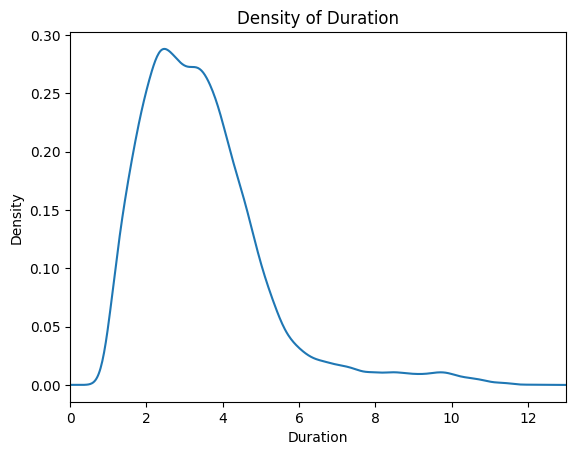

In [348]:
import matplotlib.pyplot as plt

print("Length", len(data))
print("subsets", data["subset"].unique())
print("Duration", data["duration"].sum() / 3600, "hours")
print("Sample Rate", data["sample_rate"].unique())

display(data.describe())

# plot histogram of duration of the audio files in seconds with axis names
data["duration"].plot(kind='kde', label="Duration")

# Set the labels and title
plt.xlabel('Duration')  # X-axis label
plt.ylabel('Density')  # Y-axis label
plt.xlim(0, 13)  # X-axis limits
plt.title('Density of Duration')  # Title of the plot

# To HF dataset

In [351]:
from datasets import Dataset

dataset = Dataset.from_pandas(data)

INFO - PyTorch version 2.5.1 available.


In [353]:
dataset.push_to_hub("hienng/thorsten-dataset", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/37 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/hienng/thorsten-dataset/commit/c369984b820679add7605c1a70b7340bcb3e0fe7', commit_message='Upload dataset', commit_description='', oid='c369984b820679add7605c1a70b7340bcb3e0fe7', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/hienng/thorsten-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='hienng/thorsten-dataset'), pr_revision=None, pr_num=None)